In [1]:
import signac
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
top_dir = os.path.abspath(".")
print(top_dir)

/mnt/bridges/simulations/benchmarking2021


In [3]:
# Reset to top dir
os.chdir(top_dir)
print(os.path.abspath("."))

/mnt/bridges/simulations/benchmarking2021


In [4]:
for directory in os.listdir():
    if "." not in directory:
        print(directory)

CG11x3
CG31
CG12x3
CG21x2
CG10x3
CG13x3


In [5]:
res_to_particles = {"CG11x3":6, "CG31":4, "CG12x3":9, "CG21x2":6, "CG10x3":3}

Working on  /mnt/bridges/simulations/benchmarking2021/CG11x3
Working on  /mnt/bridges/simulations/benchmarking2021/CG31
Working on  /mnt/bridges/simulations/benchmarking2021/CG12x3
Working on  /mnt/bridges/simulations/benchmarking2021/CG21x2
Working on  /mnt/bridges/simulations/benchmarking2021/CG10x3
Skipping CG13x3


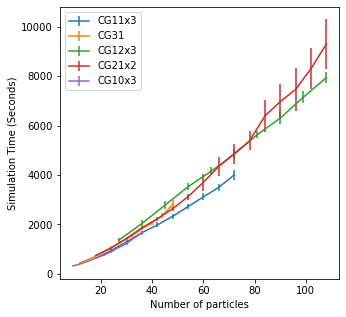

In [6]:
plt.figure(figsize = [5,5])
legend = []
store_means = {}
for directory in os.listdir():
    if "." not in directory:
        if directory == "CG13x3":
            print("Skipping", directory)
            continue
        print("Working on ", os.path.abspath(directory))
        os.chdir(directory)
        project = signac.get_project()
        schema = project.detect_schema()
        
        # Turning defaultdict into a python dictionary
        schema_values = [*schema.items()]
        statepoints = {}
        for sp in schema_values:
            for key in sp[1].keys():
                statepoints[sp[0]] = list(sp[1][key])
                statepoints[sp[0]].sort()
        means = []
        rates = []
        rates_stds = []
        stds = []
        for nmer_size in statepoints['nmer']:
            timings = []
            for job in project.find_jobs({'nmer':nmer_size}):
                timings.append(job.data['timing'])
            means.append(np.mean(timings))
            stds.append(np.std(timings))
            rates.append(np.mean(500000/np.array(timings)))
            rates_stds.append(np.std(500000/np.array(timings)))
        means = np.array(means)
        stds = np.array(stds)
        store_means[directory] = means
        
        plt.errorbar(np.array(statepoints['nmer'])*res_to_particles[directory], means, yerr = stds)
        plt.ylabel("Simulation Time (Seconds)")
        plt.xlabel("Number of particles")
        legend.append(directory)
        os.chdir(top_dir)
plt.legend(legend)

In [33]:
np.mean([store_means[key][4] for key in store_means.keys()])

2077.7790591168405

In [25]:
grand_mean = []
for key in store_means.keys():
    for value in store_means[key]:
        grand_mean.append(value)
np.mean(grand_mean)

2882.6582502827046

In [8]:
# Turning defaultdict into a python dictionary
schema_values = [*schema.items()]
statepoints = {}
for sp in schema_values:
    for key in sp[1].keys():
        statepoints[sp[0]] = list(sp[1][key])
        statepoints[sp[0]].sort()

In [9]:
statepoints

{'nmer': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'rep': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}

In [10]:
means = []
rates = []
rates_stds = []
stds = []
for nmer_size in statepoints['nmer']:
    timings = []
    for job in project.find_jobs({'nmer':nmer_size}):
        timings.append(job.data['timing'])
    print("CG foldamers of with", nmer_size*3, "monomers took:")
    print(np.mean(timings), "seconds")
    print(500000/np.mean(timings), "steps/seconds")
    means.append(np.mean(timings))
    stds.append(np.std(timings))
    rates.append(np.mean(500000/np.array(timings)))
    rates_stds.append(np.std(500000/np.array(timings)))
means = np.array(means)
stds = np.array(stds)

CG foldamers of with 9 monomers took:
314.1018943667412 seconds
1591.840128847509 steps/seconds
CG foldamers of with 12 monomers took:
398.50385649204253 seconds
1254.6930019734557 steps/seconds
CG foldamers of with 15 monomers took:
507.2374813556671 seconds
985.7315722483207 steps/seconds
CG foldamers of with 18 monomers took:
633.0699242353439 seconds
789.8021701219293 steps/seconds
CG foldamers of with 21 monomers took:
747.158235347271 seconds
669.2022872070806 steps/seconds
CG foldamers of with 24 monomers took:
890.9022400498391 seconds
561.2288054995 steps/seconds
CG foldamers of with 27 monomers took:
1066.0906692624092 seconds
469.00326061941104 steps/seconds
CG foldamers of with 30 monomers took:
1220.5718689084053 seconds
409.64404697215025 steps/seconds
CG foldamers of with 33 monomers took:
1449.0480807065965 seconds
345.054112874009 steps/seconds
CG foldamers of with 36 monomers took:
1649.2828455090523 seconds
303.16206911475797 steps/seconds


In [4]:
plt.errorbar(np.array(statepoints['nmer'])*3, means, yerr = stds)
plt.ylabel("Simulation Time (Seconds)")
plt.xlabel("Polymer Size")
plt.legend(["CG11x3"])

NameError: name 'statepoints' is not defined

<Figure size 720x720 with 0 Axes>

In [40]:
np.mean(means)

887.5967096233369

In [41]:
np.std(means)

428.4186040226726